# Identify Image

### Import necessary dependencies

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import os
import sys
import random
import tensorflow as tf


import keras
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image

Using TensorFlow backend.


### Define PATH to model

In [0]:
model_path = "D:\\repos\\finding-waldo\\weights.h5"
DATA_DIR = "D:\\repos\\finding-waldo\\train"
TEST_DIR = "D:\\repos\\finding-waldo\\test"

model = models.load_model(model_path, backbone_name='resnet50')

### ID the Image

D:\repos\finding-waldo\train
01.jpg


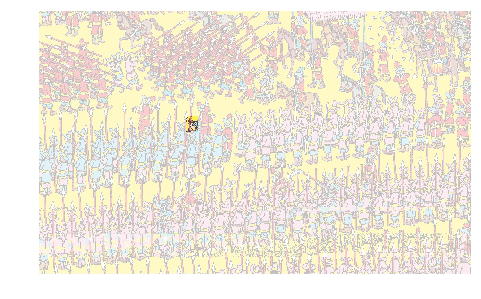

In [9]:
VIEW = 1
COUNT = 0

%cd "D:\\repos\\finding-waldo\\train"

for img in os.listdir(DATA_DIR):
  
  COUNT = COUNT + 1
  if( COUNT == VIEW ):
    print(img)
    image = read_image_bgr(img)
    draw = image.copy()
    draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

    image = preprocess_image(image)
    image, scale = resize_image(image, min_side=1800, max_side=3000)

    boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))

    boxes /= scale

    fig = plt.figure()
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    fig.add_axes(ax)

    img_mask = 255*np.ones_like(draw)

    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score < 0.5:
            break

        b = box.astype(int)
        b += np.array([-(b[2] - b[0])//4, -(b[3] - b[1])//4, (b[2] - b[0])//4, (b[3] - b[1])//4])

        img_mask[b[1]:b[3],b[0]:b[2],:] = draw[b[1]:b[3],b[0]:b[2],:]

    ax.imshow(draw, alpha=0.5)
    ax.imshow(img_mask, alpha=0.5)
    plt.axis('off')
    plt.show()
    plt.close()